In [99]:
from PIL import Image

import os, sys

def process_image(image, size):
    thumb = image.copy()
    thumb.thumbnail(size,Image.ANTIALIAS)
    img = thumb.copy()
    img_padded = Image.new("L",size,'black')
    img_padded.paste(img)
    return img_padded

def resizeImage(infile, size=(256,256)):
    im = Image.open(infile).convert('L')
    im = process_image(im, (256,256))
    return im
        



In [100]:
dir_hema = 'Hematoma'
dir_normal = 'Normal'

hemas = []
normais = []

for file in os.listdir(dir_hema):
    hemas.append(np.array(resizeImage(os.path.join('Hematoma', file))))
    
for file in os.listdir(dir_normal):
    normais.append(np.array(resizeImage(os.path.join('Normal', file))))
    
    

In [101]:
import numpy as np

X = np.concatenate((normais,hemas),axis=0)
y = np.concatenate((np.zeros(100),np.ones(100)))

In [102]:
X.shape

(200, 256, 256)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
import h5py

hf = h5py.File('dataset.h5', 'w')

hf.create_dataset('X', data=X_train)
hf.create_dataset('y', data=y_train)
hf.create_dataset('X_test', data=X_test)

hf.close()

In [105]:
import matplotlib.pyplot as plt

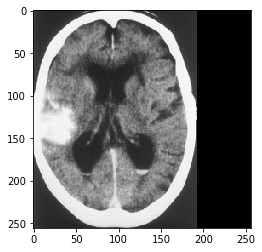

In [106]:
plt.imshow(X[197], cmap='gray')
plt.show()

In [98]:
np.savetxt('y_test.csv',y_test)